In [1]:
# Importing necessary libraries
import numpy as np

### Creating an array to show the 4x4 UCT Region

In [2]:
# Create a mock data with the values of 4x4 uct region
mock_array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [3]:
# Reshape into a 4x4 array
arr_2d = np.reshape(mock_array, (4, 4))
arr_2d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [4]:
# Adjust it based on the positions of our UCT Region
matrix = np.flipud(arr_2d.transpose())

In [5]:
# View the matrix
matrix

In [6]:
# Creating a mock matrix with 4 UCTRegions with their positions
positions = np.vstack([np.hstack([matrix, matrix]), np.hstack([matrix, matrix])])

#View
positions

array([[ 3,  7, 11, 15,  3,  7, 11, 15],
       [ 2,  6, 10, 14,  2,  6, 10, 14],
       [ 1,  5,  9, 13,  1,  5,  9, 13],
       [ 0,  4,  8, 12,  0,  4,  8, 12],
       [ 3,  7, 11, 15,  3,  7, 11, 15],
       [ 2,  6, 10, 14,  2,  6, 10, 14],
       [ 1,  5,  9, 13,  1,  5,  9, 13],
       [ 0,  4,  8, 12,  0,  4,  8, 12]])

Plotting the regions on a 2-d plot.

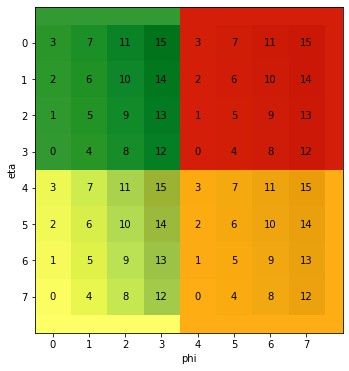

In [7]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(positions, cmap='GnBu', interpolation='nearest')
mat = ax.margins(0) # remove default margins (matplotlib verision 2+)

# Divide 4x4 regions
mat = ax.axhspan(-1, 3.5, facecolor='green', alpha=0.8)
mat = ax.axvspan(3.5, 8, facecolor='red', alpha=0.8)

mat = ax.axhspan(3.5, 8, facecolor='yellow', alpha=0.6)
# mat = ax.axvspan(3.5, 8, 1, 1, facecolor='blue')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(positions.shape[0]))
plt.xticks(range(positions.shape[1]))

# this places the numbers centered in the individual squares
for x in range(positions.shape[0]):
    for y in range(positions.shape[1]):
        ax.annotate(str(positions[x, y]), xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()

We will now get the value of positions as an array.

In [8]:
pos = np.array(positions)

We will now loop through the size of UCT Region to find the list of adjacent border values of positions in both horizontal and vertical spaces.

In [9]:
# size of the region is 4x4
size = 4
horizontal_listnew = []
vertical_listnew = []
for i in range(0,size):
    # Get the border line adjacent elements of the 4x4 region both horizontal and vertical
    horizontal_listnew.append((pos[size-1][i], pos[size][i]))
    vertical_listnew.append((pos[i][size-1], pos[i][size]))

In [10]:
horizontal_listnew

[(0, 3), (4, 7), (8, 11), (12, 15)]

<img src="images/horizontal_val.PNG">

In [11]:
vertical_listnew

[(15, 3), (14, 2), (13, 1), (12, 0)]

<img src="images/vertical_val.PNG">

- We will be using this list to find if any signal bits i.e, Electron = True values have these positions.
- If they do, we will be merging the value of their energy.